<a href="https://colab.research.google.com/github/asanneh/CS109B_Final_Project_Group_35/blob/master/CS109B_Final_Project_Group_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    
##<div align="center">COMPSCI 109B Final Project - Group 35</div>







#<div align="center"> Project: Measuring the Shape and Brightness of Galaxies with Neural Networks</div>




#<div align='center'> Alpha Sanneh, Brian Tao, Grace Greason, Evan Arnold</div>



<div align='center>##Alpha Sanneh, Brian Tao, Grace Greason, Evan Arnold</div>

In [0]:
#install libraries we need here
# !pip install tf_keras_vis

In [0]:
#import relevant libraries
# from __future__ import annotations
import numpy as np
import seaborn as sns
import os
import datetime
import h5py
import matplotlib.pyplot as plt
import pandas.util.testing as tm
# sns.set()
%matplotlib inline

In [0]:

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D,\
#                                     Dropout, Flatten, Activation, Input, UpSampling2D
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.metrics import AUC, Precision, Recall, FalsePositives, \
#                                      FalseNegatives, TruePositives, TrueNegatives
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.regularizers import l2

In [0]:
# tf.keras.backend.clear_session()  # For easy reset of notebook state.
# print(tf.__version__)  

In [0]:
#Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
file_path = '/content/drive/My Drive/'
os.chdir(file_path)
print('Working Directory:',os.getcwd())

Working Directory: /content/drive/My Drive


In [0]:
 #reading data
f=h5py.File('Data.h5','r')
image = f['img'][:]    
cat = f['cat'][:]  
label = f['label'][:]   # this gives the set of parameters that characterize the galaxy 
snr = f['snr'][:]
sigma = f['sigma'][:]
image_nonoise = f['img_nonoise'][:]    
image_withnoise = f['img_withnoise'][:]    
f.close()


In [0]:
#shape  with noise and image_nonoise
image.shape, image_nonoise.shape

((18779, 64, 64), (18779, 64, 64))

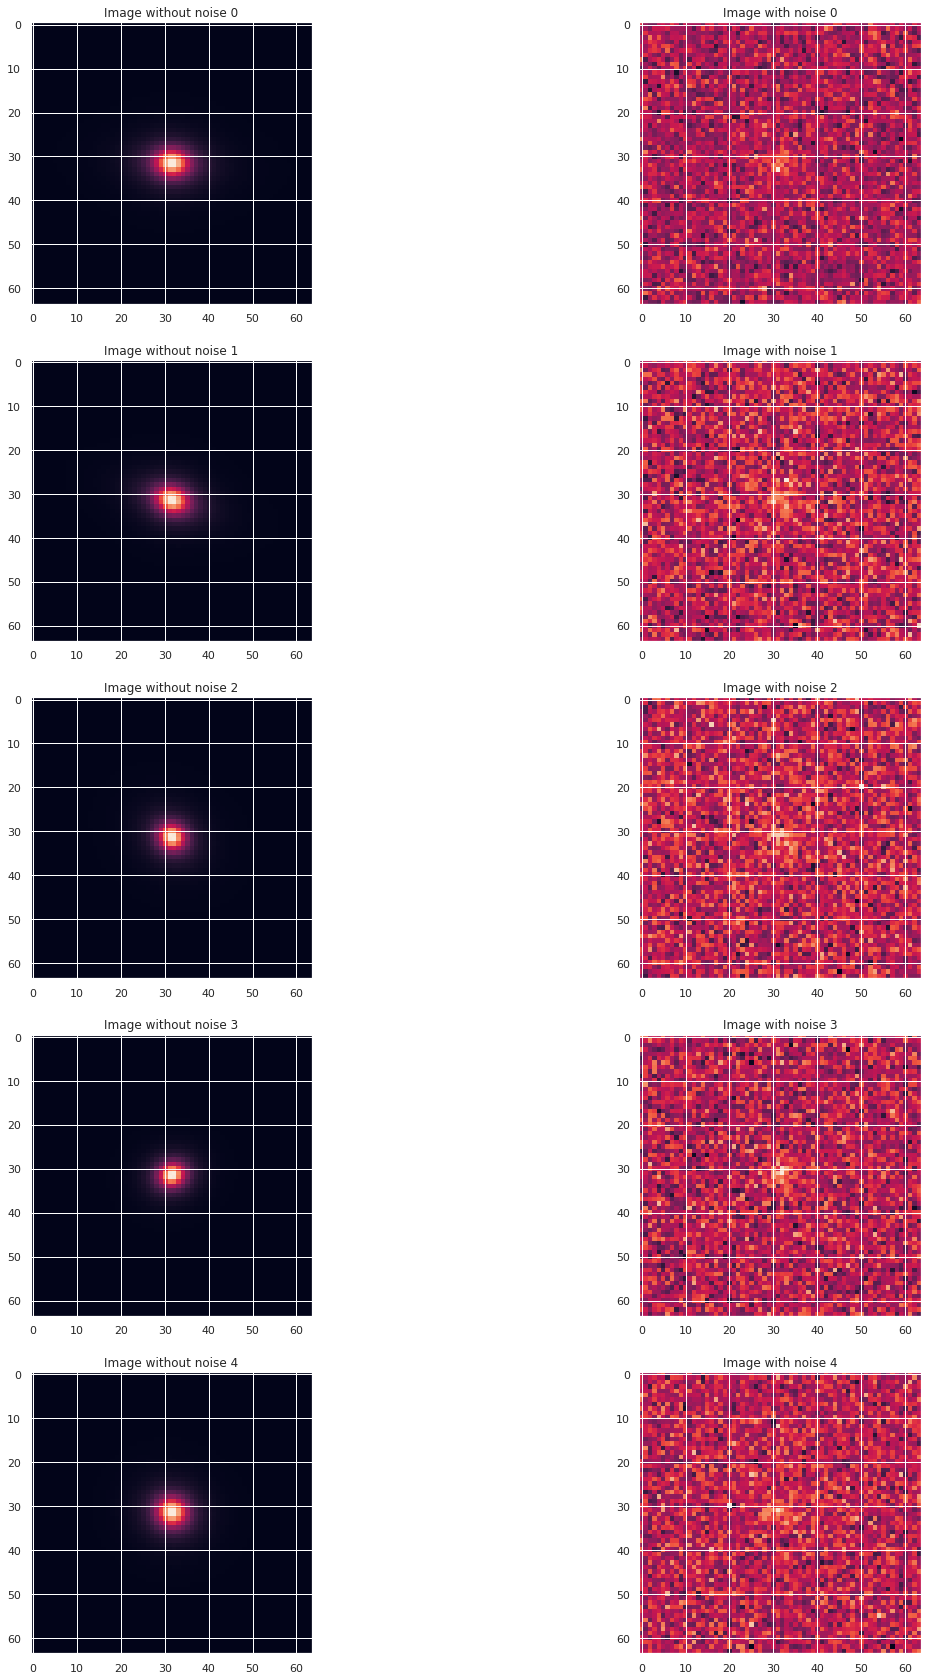

In [45]:
fig, ax = plt.subplots(5,2, figsize=(20,30))

for i in range(5):
    ax[i][0].imshow(image_nonoise[i])
    ax[i][0].set_title('Image without noise {}'.format(i))
    ax[i][1].imshow(image_withnoise[i])
    ax[i][1].set_title('Image with noise {}'.format(i))




**Distribution of Noise:** Below we plot the histogram of the noise of the dataset along with the best fit normal distribution. We do so to verify that the noise is indeed Gaussian. This will inform our model design. Specifically, it will allow us to model the noise in order to better predict the response.

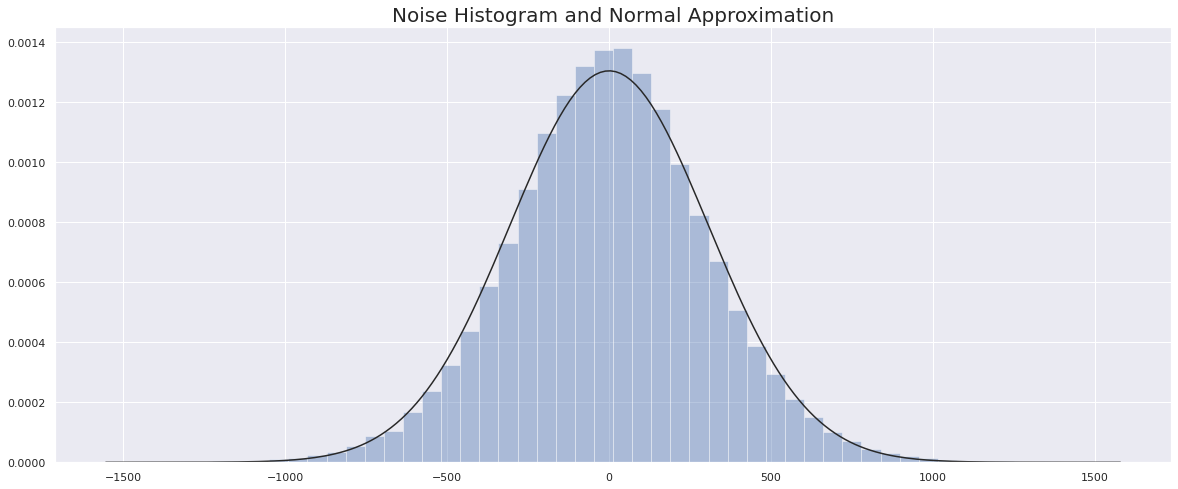

In [44]:
from scipy.stats import norm
# distribution of noise (first n pixels for efficiency)
n = 100000
# noise
noise = image_withnoise - image_nonoise
noise = noise.reshape(-1, 1)
# plot
fig, ax = plt.subplots(figsize=(20,8))
sns.distplot(noise[1:n], fit=norm, kde=False, ax=ax)
ax.set_title('Noise Histogram and Normal Approximation', fontsize=20);

**Response Distribution/Correlation:** As shown below, the response variables have no significant correlation aside from g1 and g2. We expect the scatters of circles as both g1 and g2 are functions of the same variables using different sinusoid functions (cos vs. sin). Care should be taken when modeling g1 and g2 as their outcome is highly correlated (though in a non-linear fashion).

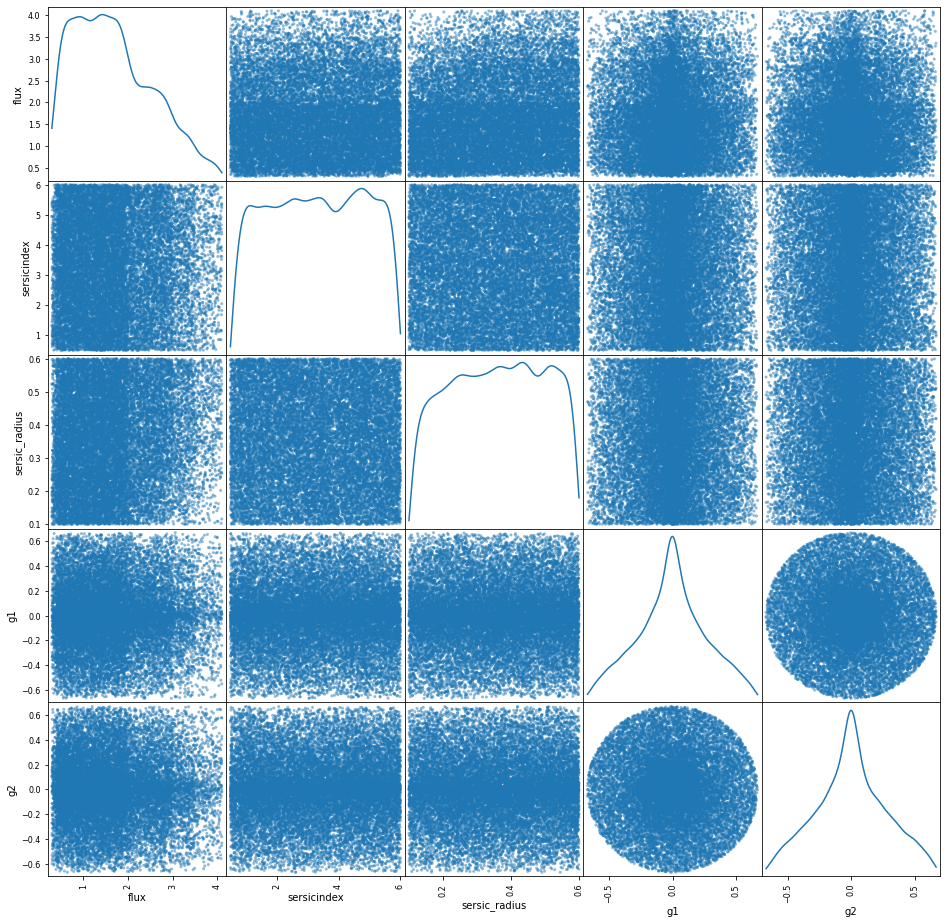

In [0]:
import pandas as pd
# convert response 2D array to labeled dataframe
label_df = pd.DataFrame(label, columns=['flux', 'sersic' 'index', 'sersic_radius', 'g1', 'g2'])
# scatter matrix of response
pd.plotting.scatter_matrix(label_df, figsize=(16, 16), diagonal='kde');

In [10]:
print(f'Image with noise max: {image_withnoise[0].max()}')
print(f'Image with noise min: {image_withnoise[0].min()}')
print(f'Image with no noise max: {image_nonoise[0].max()}')
print(f'Image with no noise min: {image_nonoise[0].min()}')

Image with noise max: 1088.6094996083598
Image with noise min: -799.6288667294024
Image with no noise max: 455.3077087402344
Image with no noise min: 0.03963421285152435


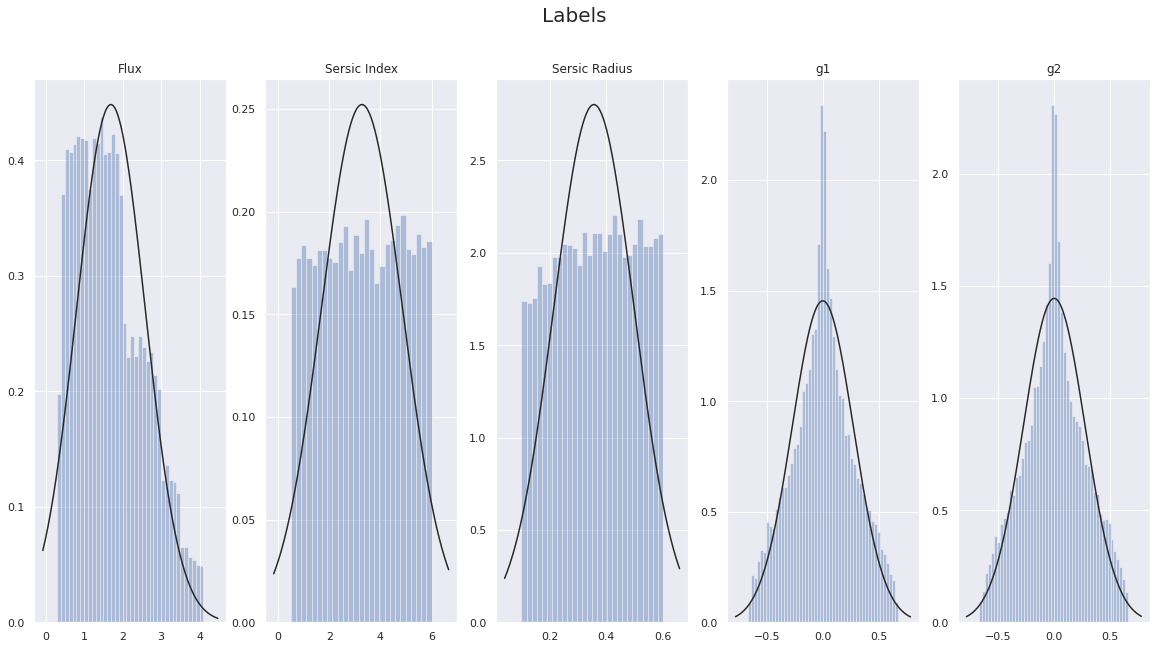

In [24]:
fig, ax = plt.subplots(1,5, figsize=(20,10));
fig.suptitle('Labels', fontsize=20)
sns.distplot(label[:, 0], fit=norm, kde=False, ax=ax[0]).set_title('Flux')
sns.distplot(label[:, 1], fit=norm, kde=False, ax=ax[1]).set_title('Sersic Index')
sns.distplot(label[:, 2], fit=norm, kde=False, ax=ax[2]).set_title('Sersic Radius')
sns.distplot(label[:, 3], fit=norm, kde=False, ax=ax[3]).set_title('g1')
sns.distplot(label[:, 4], fit=norm, kde=False, ax=ax[4]).set_title('g2')
plt.show()

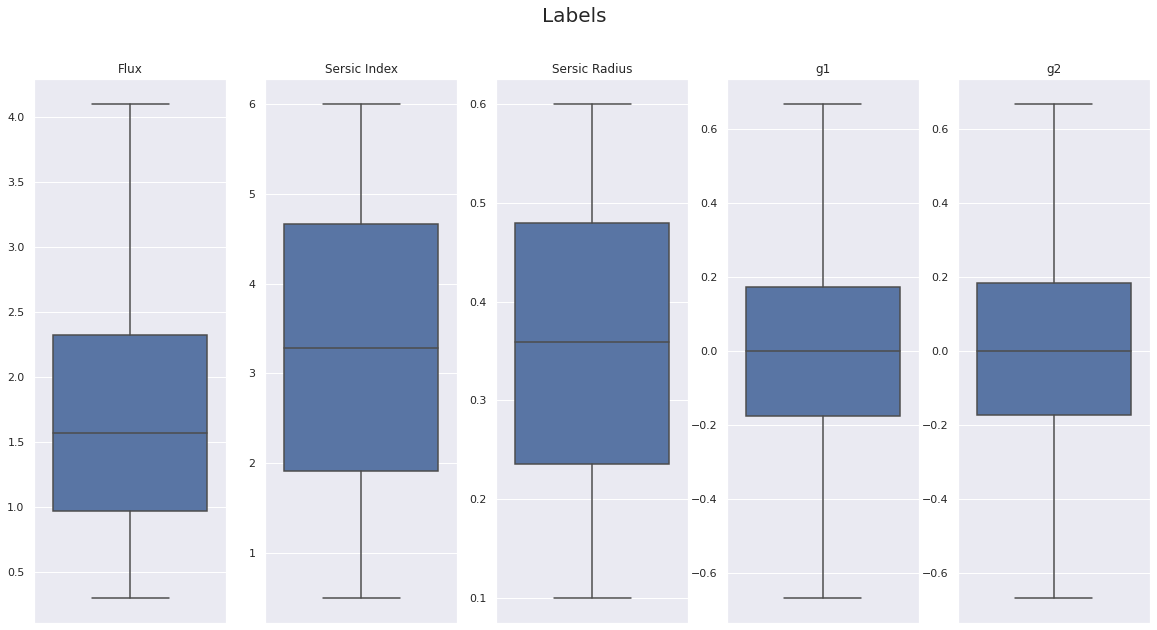

In [33]:
fig, ax = plt.subplots(1,5, figsize=(20,10));
fig.suptitle('Labels')

fig.suptitle('Labels', fontsize=20)
sns.boxplot(label[:, 0],  ax=ax[0], orient='v').set_title('Flux')
sns.boxplot(label[:, 1],  ax=ax[1], orient='v').set_title('Sersic Index')
sns.boxplot(label[:, 2],  ax=ax[2], orient='v').set_title('Sersic Radius')
sns.boxplot(label[:, 3],  ax=ax[3],orient='v').set_title('g1')
sns.boxplot(label[:, 4],  ax=ax[4], orient='v').set_title('g2')
plt.show()


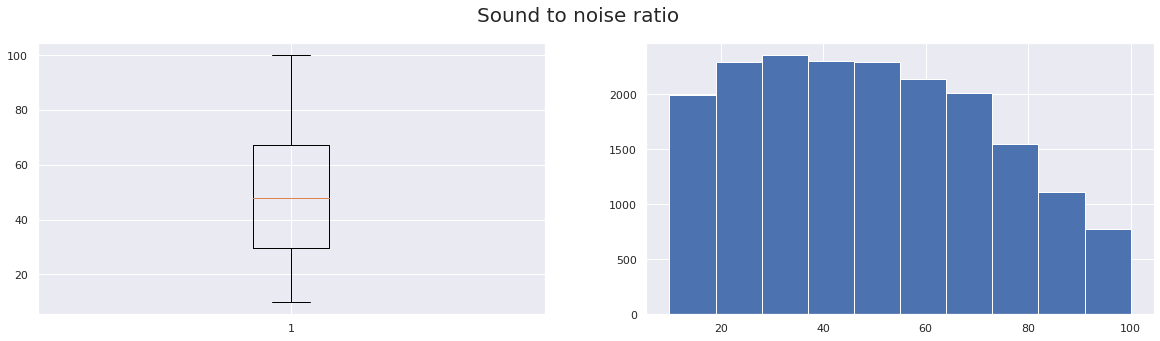

In [39]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Sound to noise ratio', fontsize=20);

ax[0].boxplot(snr);
ax[1].hist(snr);

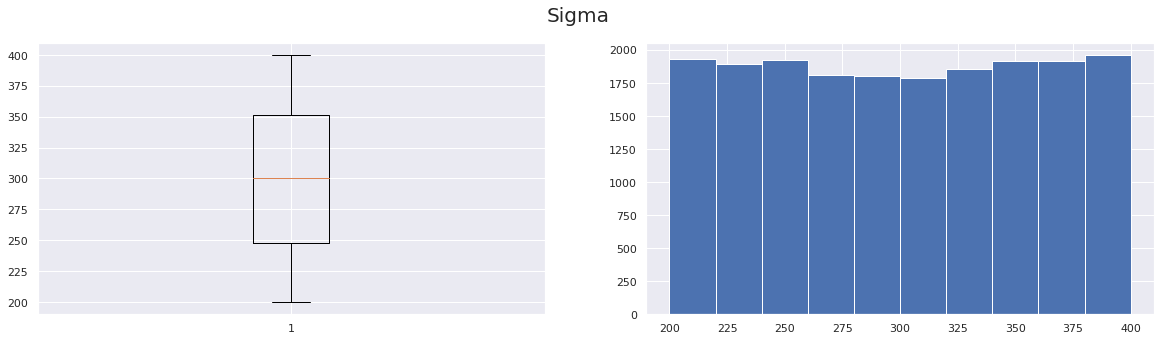

In [38]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Sigma', fontsize=20);

ax[0].boxplot(sigma);
ax[1].hist(sigma);